#  DSN and Microsoft Skills for Job Hackathon
---
The objective of the challenge is to predict the price (Amount (Million Naira) the company should sell a car based on the available data
- ID
- Location
- Amount (Million Naira)
-Bathroom
- Bedroom
- Parking space

**The objective is to predict the price.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the necessary libraries in python
- **Matplotlib and Seaborn Library:** Matplotlib and searborn is a plotting library for Python.
- **Pandas and Numpy :** Pandas and NumPy are two popular Python libraries used for data manipulation and analysis

In [ ]:
# Use pip to install geopandas library
!pip install geopandas

In [ ]:
!pip install squarify

In [ ]:
# Importing pandas, numpy matplotlib and seabron
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Ingestion
---
The dataset stored for this project is stored in csv file on our local file

**Note:** We will be using the pandas library to load the data in this notebook

In [ ]:
# Connecting to the file source
data = pd.read_csv('/content/drive/MyDrive/DSN Housing Prediction in Nigeria/Housing_dataset_train.csv')
df = pd.DataFrame(data)

In [ ]:
column_counts = len(df.columns)
print(f'There are {column_counts} columns.')
print('The columns are:')
n = 0
for column in df.columns:
    n+=1
    print(n,column)

There are 7 columns.
The columns are:
1 ID
2 loc
3 title
4 bedroom
5 bathroom
6 parking_space
7 price


In [ ]:
# Shaping the shape of the dataset
data_shape = df.shape
print(f'There are {data_shape[0]} rows and {data_shape[1]} columns in this dataset')

There are 14000 rows and 7 columns in this dataset


In [ ]:
# checking 10 samples of the dataset using the (pd.sample) function
df.sample(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
10964,3751,Bauchi,Terrace duplex,7.0,NaN,5.0,2030763.644
12212,2133,Enugu,NaN,3.0,1.0,2.0,1870467.169
6260,12903,Gombe,NaN,9.0,5.0,2.0,2717766.381
955,1558,Gombe,Bungalow,3.0,NaN,2.0,1142494.259
4258,11188,Abia,NaN,5.0,2.0,3.0,1503064.282
7146,11916,Ekiti,Mansion,NaN,7.0,1.0,2659482.180
6952,6545,Yobe,NaN,8.0,1.0,3.0,2185931.906
1174,1054,NaN,Cottage,5.0,1.0,NaN,1853407.049
4239,7232,Rivers,Penthouse,8.0,1.0,4.0,4638131.560
9165,2702,NaN,Penthouse,8.0,4.0,5.0,3655079.922


In [ ]:
# Using the info() method to prints information about the DataFrame.
df.info()
print('Based on the output of this function \nThere some null values and we need to change some data type')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
Based on the output of this function 
There some null values and we need to change some data type


#### Checking for Duplicates and Removing it

Since the id column must not be duplicated.  
We are going to remove any rows that has same ID, Location and Same Title from the dataframe, while keeping the first duplicated values

In [ ]:
# Using the duplicated() method to perform the task above
duplicated_data = df.duplicated(['ID','title','loc'],keep='first')
print(f'The dataset revealed that {duplicated_data.sum()} duplicated rows')
df[duplicated_data].head()

The dataset revealed that 24 duplicated rows


,ID,loc,title,bedroom,bathroom,parking_space,price
3061,3083,NaN,Mansion,3.0,2.0,1.0,1.376340e+07
4301,2430,Bauchi,Detached duplex,9.0,1.0,NaN,2.720273e+06
5152,2929,NaN,Flat,3.0,2.0,1.0,1.284348e+06
6439,1194,Akwa Ibom,Semi-detached duplex,2.0,3.0,NaN,1.764463e+06
7034,1731,Benue,Townhouse,5.0,NaN,3.0,1.826790e+06


In [ ]:
# Creating a new dataframe with tilde(~) to remove the duplicated rows
df = df[~df.duplicated(['ID','title','loc'],keep='first')]
data_shape = df.shape
df.head()
print(f'There {data_shape[0]} rows now in the dataset')

There 13976 rows now in the dataset


In [ ]:
# Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13976 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             13976 non-null  int64  
 1   loc            12174 non-null  object 
 2   title          12256 non-null  object 
 3   bedroom        12179 non-null  float64
 4   bathroom       12174 non-null  float64
 5   parking_space  12169 non-null  float64
 6   price          13976 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 873.5+ KB


### Dealing with Null
---
The location (loc), title and bedroom column shows there are missing values in these 3 columns

#### Dealing with Null Values for Text Columns

In [ ]:
text_columns = ['loc','title','bedroom']
for col in text_columns:
    null_loc = df[col].isnull().sum()
    print(f'There are {null_loc} missing values in the {col} column')


There are 1802 missing values in the loc column
There are 1720 missing values in the title column
There are 1797 missing values in the bedroom column


**Note**  
- Removing 1,802, 1720 and 1797 is not good for the model we are trying to build.
- Large data is always good for machine learning model
- Since there are 13,976 now available after removing duplicated values.  
- The best solution now is to fill the null values **backwards, forwards, also with the mode of the column**.    

By chaining these three fillna() calls, you ensure that both forward fill, backward fill and mode fill are applied consecutively, resulting in a column where null values are replaced with the nearest non-null values from both directions.

In [ ]:
# Checking null values for the entire dataset
df.isnull().sum()

ID                  0
loc              1802
title            1720
bedroom          1797
bathroom         1802
parking_space    1807
price               0
dtype: int64

In [ ]:
# Creating a function to fill NA using (forward, backward and mode fill) for text columns

def fill_text_columns(df, text_column):
    # Iterate over each column specified in text_column
    for col in text_column:
        # Fill null values in the current column using forward fill, backward fill, and mode imputation
        df[col] = df[col].fillna(method='ffill').fillna(method='bfill').fillna(df[col].mode())
     # Return the modified DataFrame with filled values
    return df


In [ ]:
# Using fill_text_columns that is defined earlier to append the dataframe

df = fill_text_columns(df, text_columns)
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,2.0,2.0,4.0,1672416.689
2,9261,Ekiti,Apartment,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898


In [ ]:
# Checking the data frame info for the text column

df[['loc','title','bedroom']].isnull().sum()

print('No null values in the 3 columns')

No null values in the 3 columns


#### Dealing with Null Values for Numeric Columns

- There are two numeric columns that have null values for this dataset
- The columns are " Bathroom, parking_space" columns
- We are going to fill missing values with average respectively

By Filling missing values with the average helps to preserve the overall distribution of the numerical column.

In [ ]:
numeric_columns = ['bathroom','parking_space']

In [ ]:
# Creating a function to fill NA using their average for numeric columns

def fill_numeric_columns(df, numeric_column):
    # Iterate over each column specified in numeric_column
    for col in numeric_column:
        col_average = df[col].mean()
        # Fill null values in the current column using each column average imputation
        df[col] = df[col].fillna(col_average)
     # Return the modified DataFrame with filled values
    return df

In [ ]:
# Modifying the dataframe with fill_numeric_column function
df = fill_numeric_columns(df, numeric_columns)

# Checking the modified columns
print(df[['bathroom','parking_space']].isnull().sum())

# Checking the info of the entire dataset
print(f' \nInfo of the dataset \n')
df.info()

print('No null values in the entire dataset')

bathroom         0
parking_space    0
dtype: int64
 
Info of the dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13976 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             13976 non-null  int64  
 1   loc            13976 non-null  object 
 2   title          13976 non-null  object 
 3   bedroom        13976 non-null  float64
 4   bathroom       13976 non-null  float64
 5   parking_space  13976 non-null  float64
 6   price          13976 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 873.5+ KB
No null values in the entire dataset


**Changing all the numeric columns to integer**

In [ ]:
# Defining the numeric columns
numeric_columns = ['bedroom','bathroom','parking_space','price']

# Using lambda function to change the columns to integer
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.astype(int))

In [ ]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2,2,1,1149999
1,2748,Ondo,Apartment,2,2,4,1672416
2,9261,Ekiti,Apartment,7,5,3,3364799
3,2224,Anambra,Detached duplex,5,2,4,2410306
4,10300,Kogi,Terrace duplex,5,5,6,2600700


## Data Exploration
---
Data exploration refers to the process of examining and analyzing a dataset to gain a deeper understanding of its characteristics, structure, patterns, and relationships.


In [ ]:
# Generating the descriptive statistic of the dataset with describe()

df.describe()

,ID,bedroom,bathroom,parking_space,price
count,13976.000000,13976.000000,13976.000000,13976.000000,1.397600e+04
mean,4868.046079,4.304951,3.117559,3.148111,2.137941e+06
std,3819.128452,2.436518,1.900793,1.493634,1.079022e+06
min,0.000000,1.000000,1.000000,1.000000,4.319670e+05
25%,1675.000000,2.000000,2.000000,2.000000,1.394245e+06
50%,3533.500000,4.000000,3.000000,3.000000,1.895881e+06
75%,8020.250000,6.000000,4.000000,4.000000,2.587417e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


#### Exploring the title column

In [ ]:

print(df['title'].nunique())
df['title'].unique()

# These shows that there are 10 different apartment according to this dataset

10


array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

Text(0, 0.5, 'Apartment Title')

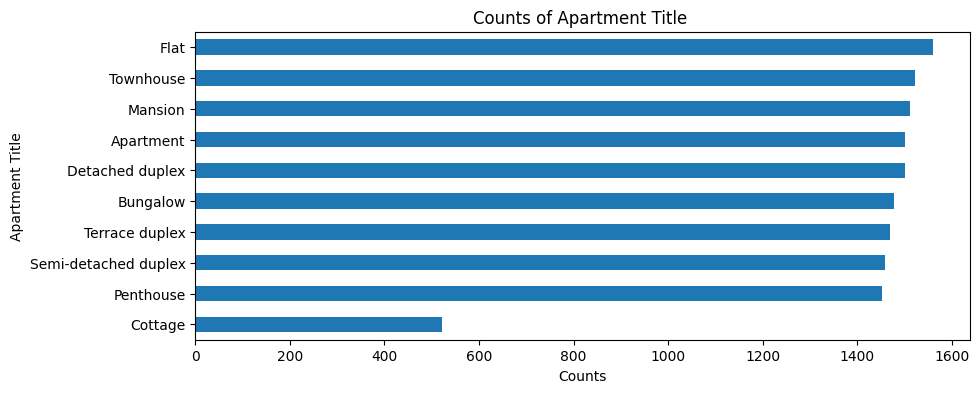

In [ ]:
# Plotting the counts of title column using bar chart
df['title'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,4))
plt.title('Counts of Apartment Title ')
plt.xlabel('Counts')
plt.ylabel('Apartment Title')

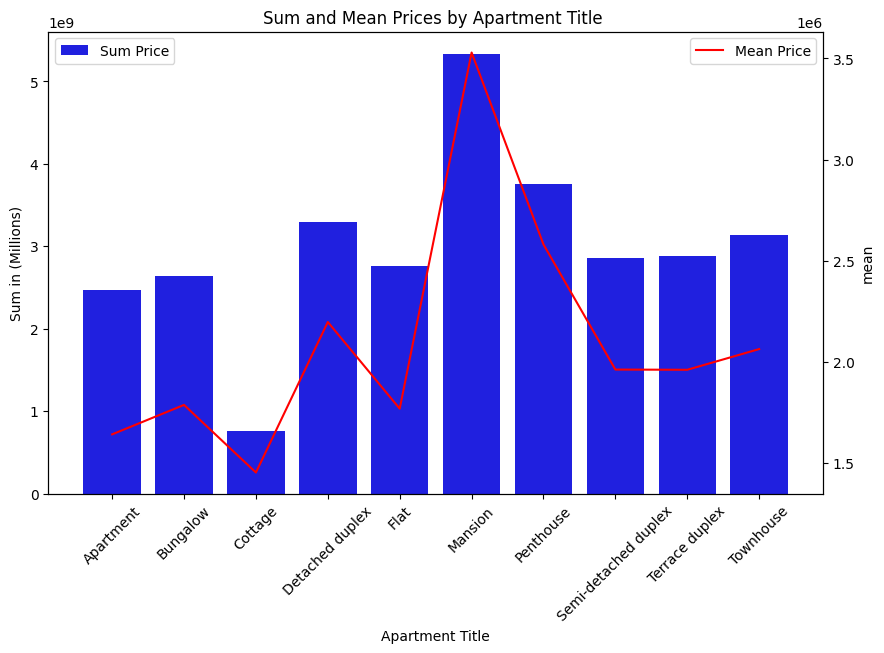

In [ ]:
# Plotting title column with price column
# Group by 'title' and calculate sum and mean
title_price = df.groupby('title')['price'].agg([('sum', 'sum'), ('mean', 'mean')]).round(0).reset_index()
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

# Create a bar chart for the sum values
ax = sns.barplot(data=title_price, x='title', y='sum', color='blue', label='Sum Price')
plt.ylabel(f'Sum in (Millions)')
plt.xlabel(f'Apartment Title')
# Create a secondary y-axis
ax2 = ax.twinx()

# Plot the line chart for the mean values and provide a label for the legend
sns.lineplot(data=title_price, x='title', y='mean', color='red', ax=ax2, label='Mean Price')

# Set the chart title and axis labels
plt.title('Sum and Mean Prices by Apartment Title ')

# Display the legend for both axes
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels if needed

# Display the chart
plt.show()


In [ ]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2,2,1,1149999
1,2748,Ondo,Apartment,2,2,4,1672416
2,9261,Ekiti,Apartment,7,5,3,3364799
3,2224,Anambra,Detached duplex,5,2,4,2410306
4,10300,Kogi,Terrace duplex,5,5,6,2600700


### Exploring other Categorical Variables
____

Exploring the bedroom, bathroom and parking space column in relation to price

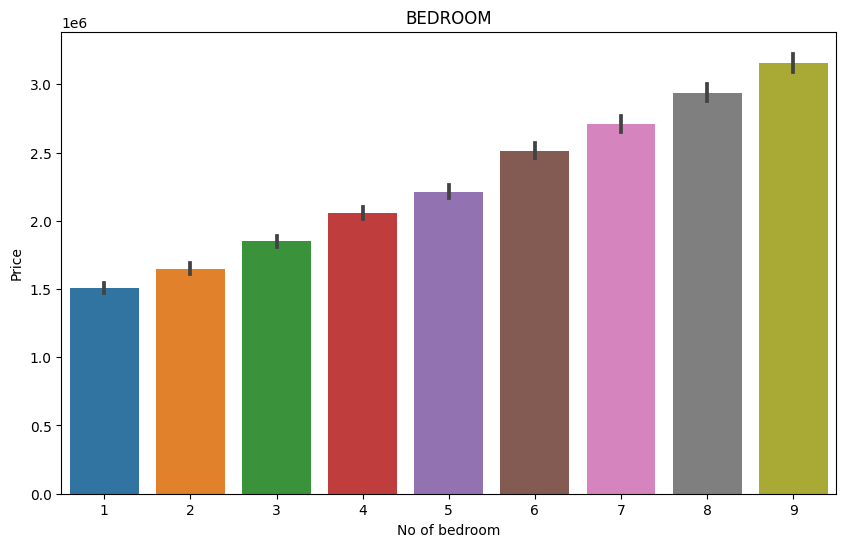

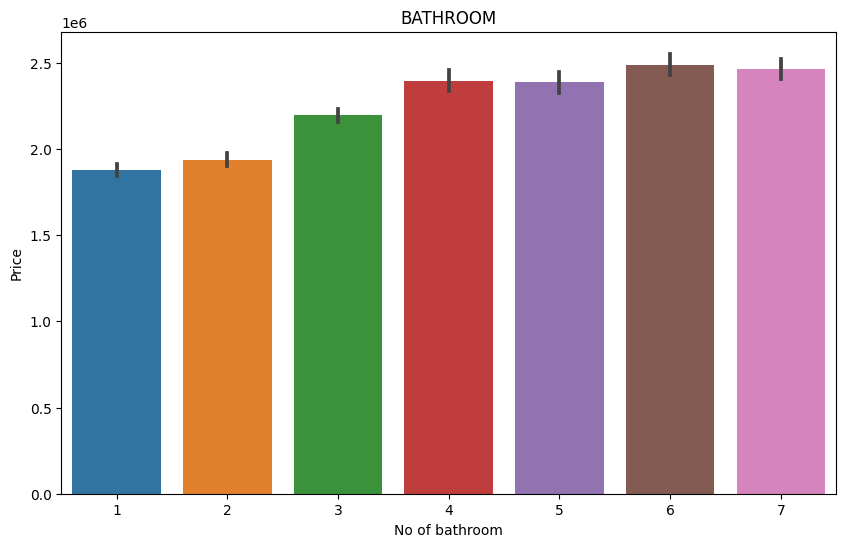

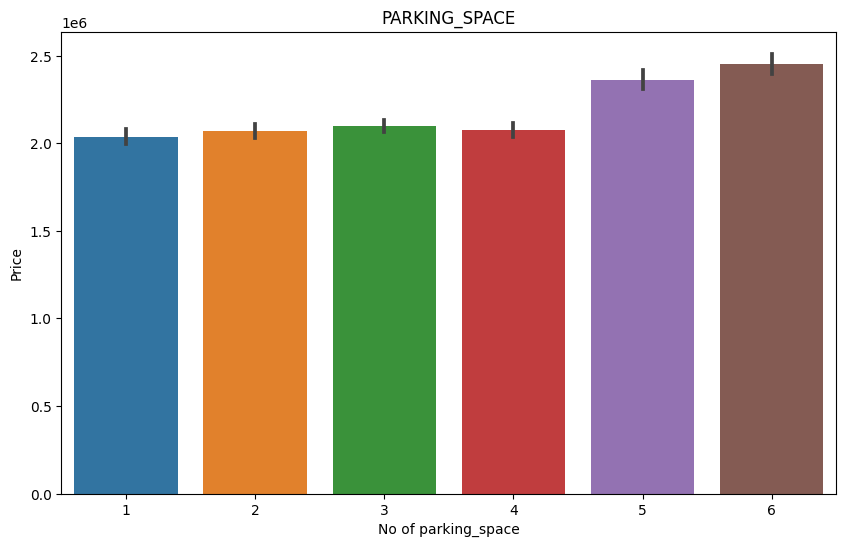

In [ ]:
# Defining Categories
cat_features = ['bedroom','bathroom','parking_space']
# Creating for loop to iterate the features
for col in cat_features:
  # Creating bar chart to visualize the items
  plt.figure(figsize=(10,6))
  sns.barplot(data=df,x=col,y='price')
  plt.title(col.upper())
  plt.ylabel('Price')
  plt.xlabel(f'No of {col}')
  plt.show()

**Summary of Exploration of the Categorical Columns**

No of bathroom and bedroom has significantly influence on price, while parking space has small influence unless the parking space is 5 or 6

### Exploration of Price Column

<Axes: xlabel='price', ylabel='Count'>

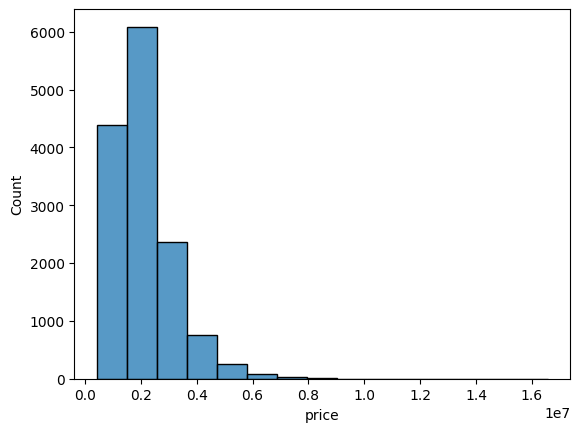

In [ ]:
# Price Distribution
sns.histplot(df['price'], bins=15)


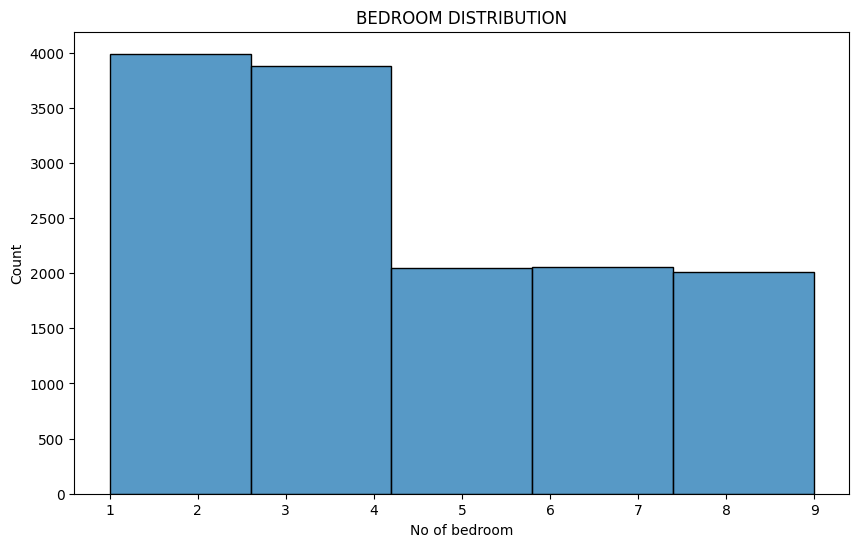

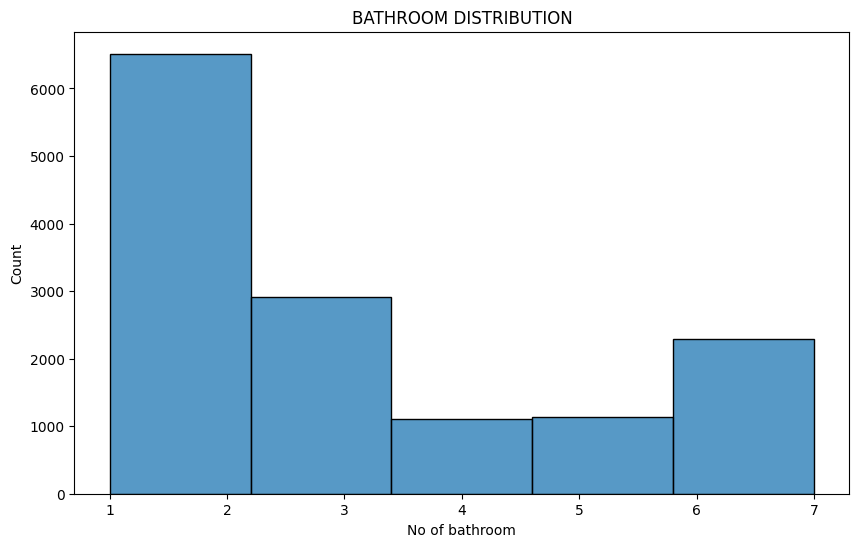

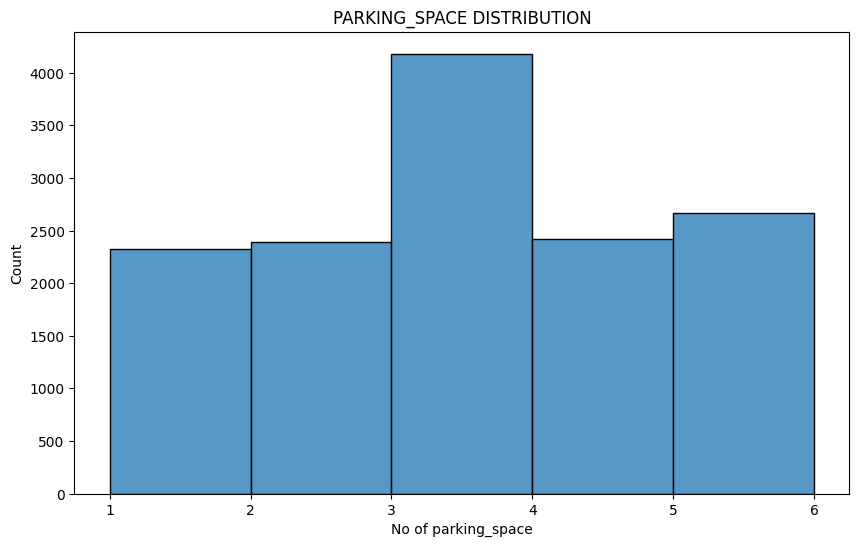

In [ ]:
# Defining Categories
cat_features = ['bedroom','bathroom','parking_space']
# Creating for loop to iterate the features
for col in cat_features:
  # Creating bar chart to visualize the items
  plt.figure(figsize=(10,6))
  sns.histplot(df[col], bins=5)
  plt.title(f'{col.upper()} DISTRIBUTION')
  plt.ylabel('Count')
  plt.xlabel(f'No of {col}')
  plt.show()

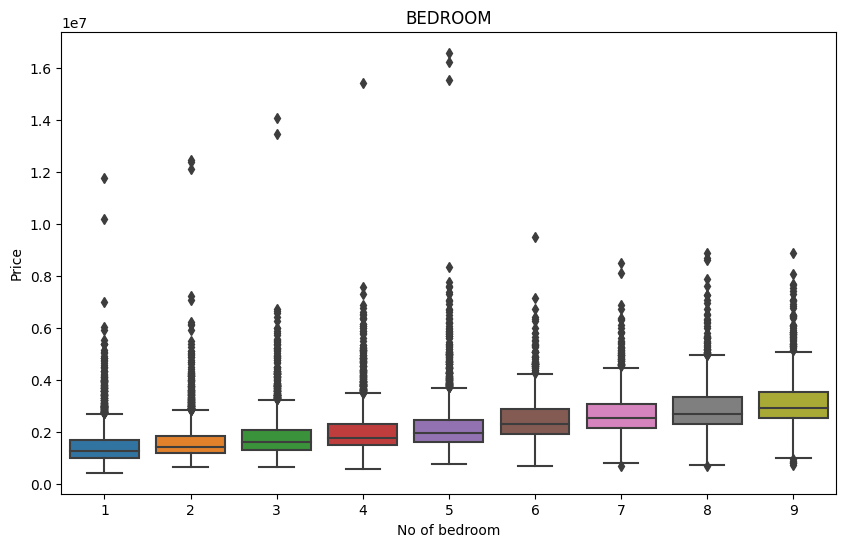

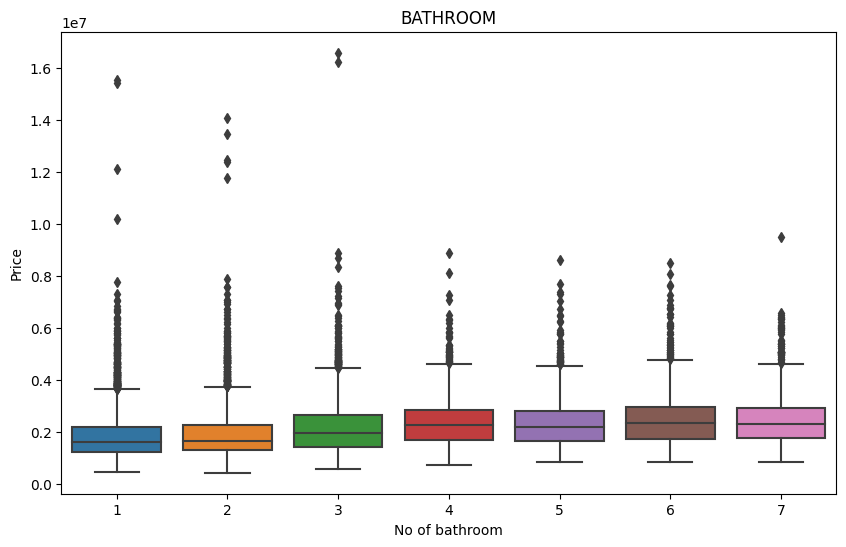

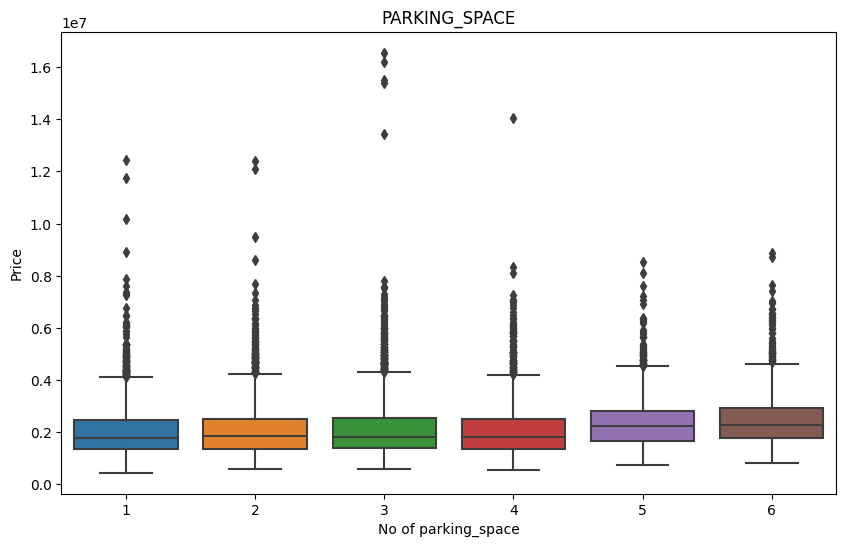

In [ ]:
# Defining Categories
cat_features = ['bedroom','bathroom','parking_space']
# Creating for loop to iterate the features
for col in cat_features:
  # Creating bar chart to visualize the items
  plt.figure(figsize=(10,6))
  sns.boxplot(data=df,x=col,y='price')
  plt.title(col.upper())
  plt.ylabel('Price')
  plt.xlabel(f'No of {col}')
  plt.show()

**Summary**
_____

If a histogram of housing prices is skewed to the right, it means that the majority of housing prices are concentrated towards the lower end, with a long tail on the right side representing relatively fewer higher-priced properties.

Majority of this customers are purchasing houses between 1 to four bedrooms. This align with the mean value of 4.3 and standard deviation of 2.4.

Also, majority of the customers majorly purchased houses with 1 to 3 bathrooms. This align with the mean value of 3.1 and standard deviation of 1.9.

With the parking space, majority of the customers are purchasing houses with 3 to 4 parking space. This also align with the mean value of 3.2 and standard deviation of 1.5

It is common to observe this pattern in real estate markets, where the majority of properties fall within a certain price range, while a smaller number of high-end properties contribute to the right tail of the distribution.

### Effect of Categorical Features on Price

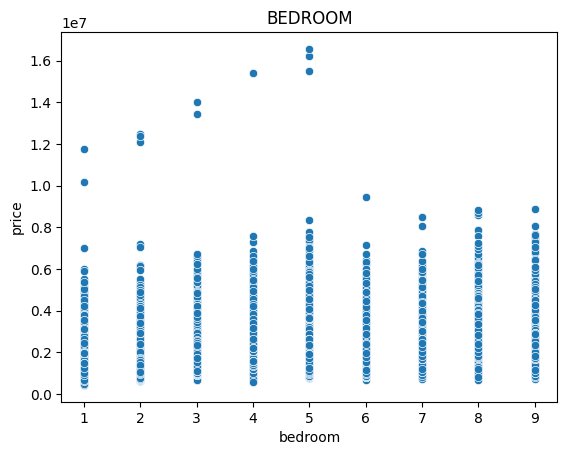

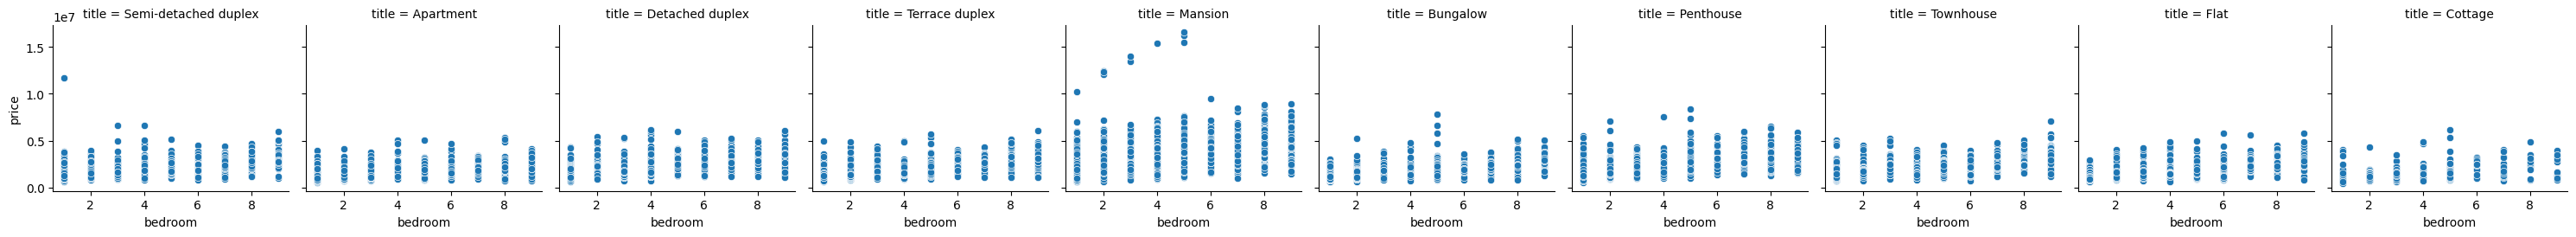

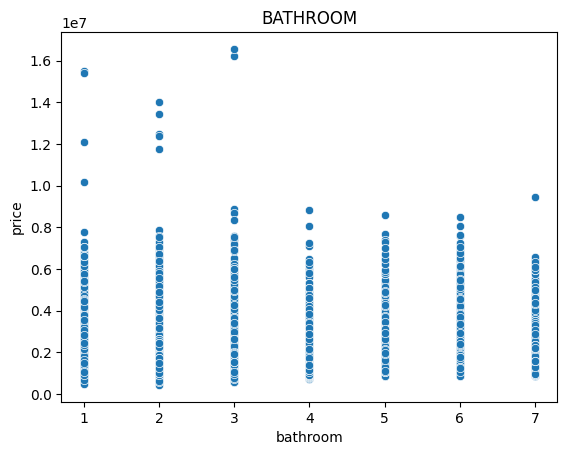

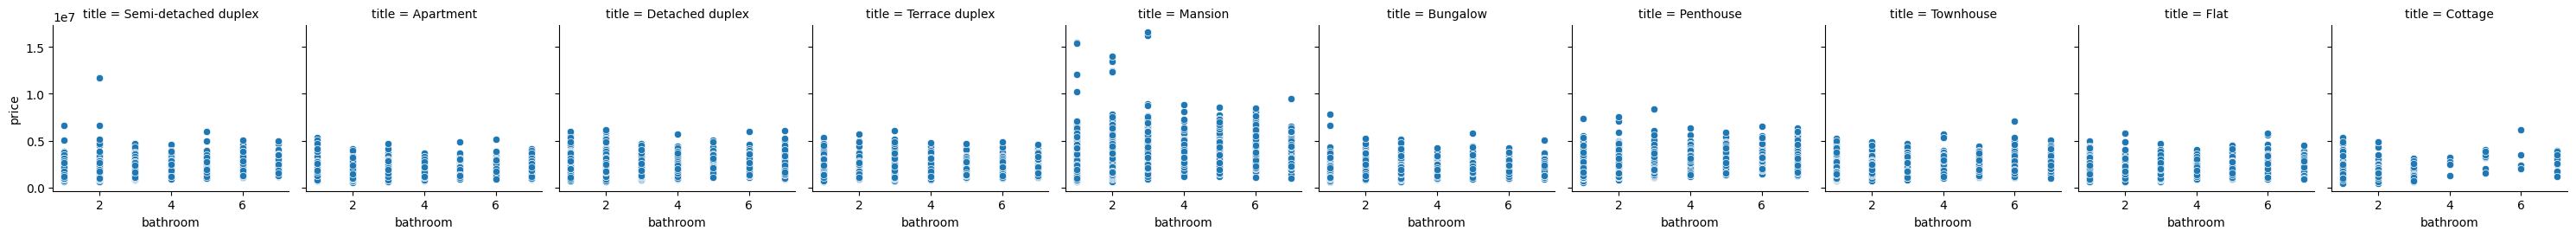

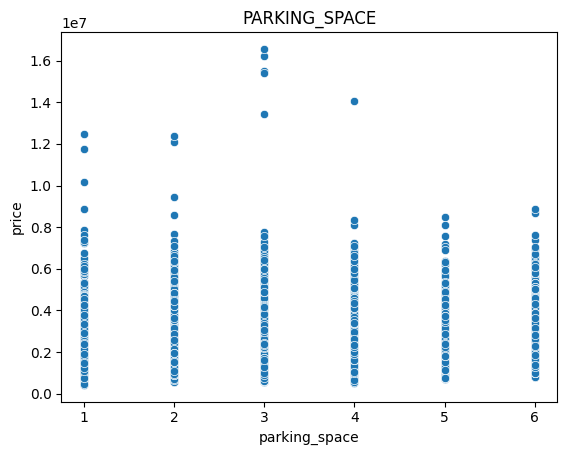

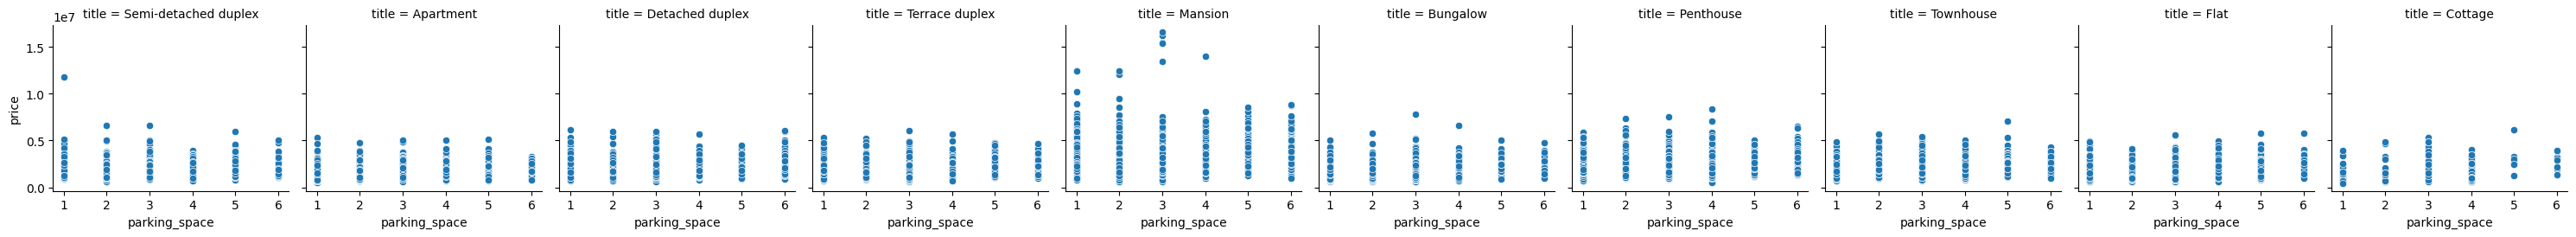

In [ ]:
cat_features = ['bedroom','bathroom','parking_space']
for col in cat_features:
  # Scatter plot using relplot
  plt.title(col.upper())
  sns.scatterplot(data=df, x=col, y='price')

  # Create a FacetGrid
  g = sns.FacetGrid(data=df, col='title')

  # Display the scatter plot in each facet
  g.map(sns.scatterplot, col, 'price')

  # Show the plot
  plt.show()



### Exploring the Location (loc) Column

<Axes: title={'center': 'Top 10 Location by Price'}, xlabel='loc'>

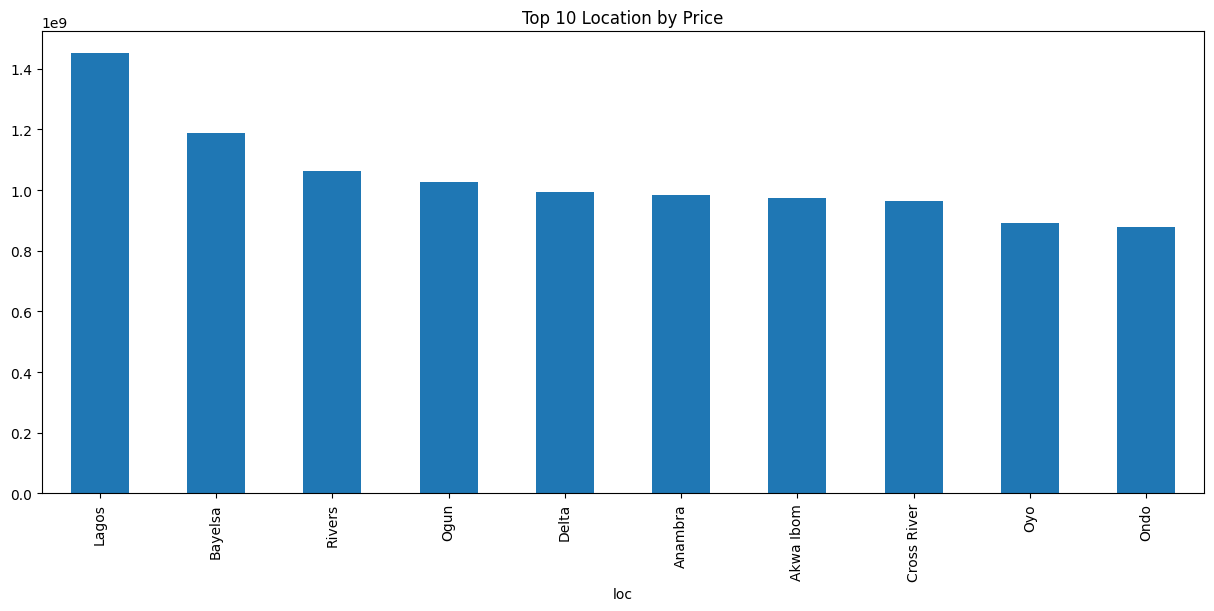

In [ ]:
state_price = df.groupby('loc')['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.title('Top 10 Location by Price')
state_price[:10].plot(kind='bar')

For this code to work effectively, we have to install squarify using pip.  
!pip install squarify

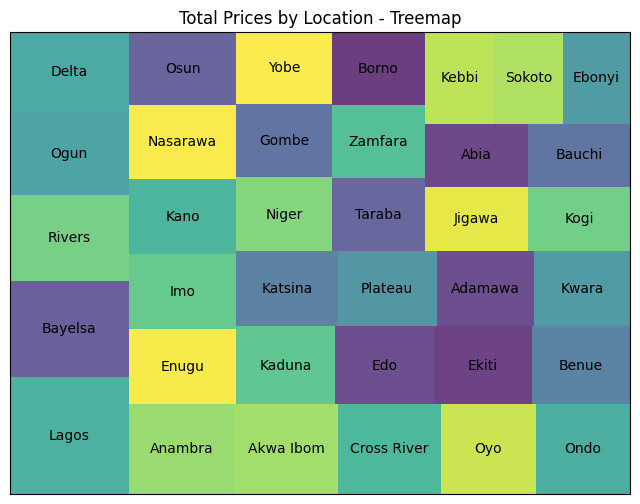

In [ ]:
# Importing squarify
import squarify

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Generate treemap data
sizes = state_price.values
labels = state_price.index

# Plot the treemap using squarify
squarify.plot(sizes=sizes, label=labels, ax=ax, alpha=0.8)

# Set plot title
plt.title('Total Prices by Location - Treemap')

# Remove axis ticks and labels
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Display the treemap
plt.show()


<ipython-input-30-4cfeffed375f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


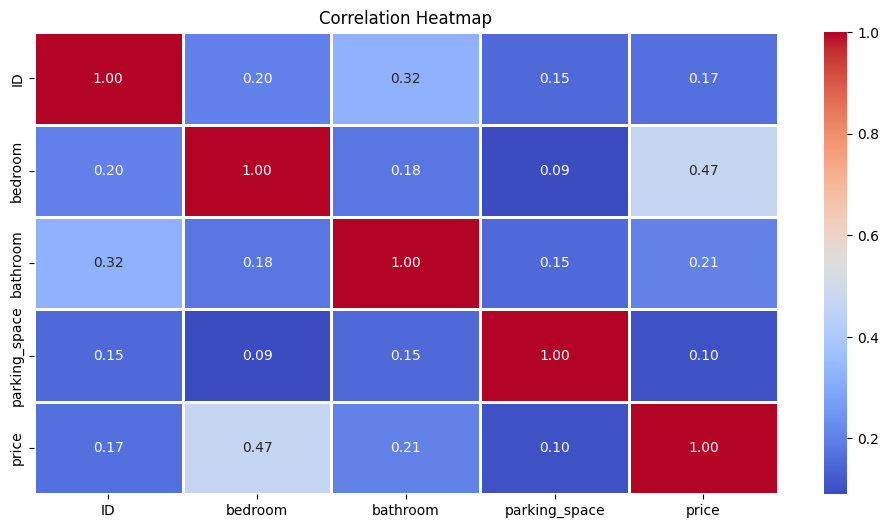

In [ ]:
# Creating a correlation matrix to visualize the correlation among the numeric column

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
			cmap = 'coolwarm',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
plt.title('Correlation Heatmap')
plt.show()


**Note**
We can see from the correlation matrix, that the data distribution follows one of the assumption of regression of No Multicollinearity of the variables.

Defining X and Y Variables.  
The y variable (Predictor) will be the price Column.  
The X variables which serves as the Independent variable will contain all columns in the dataset except the ID and price column.

In [ ]:
df.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [ ]:
y = df['price']
X = df.drop(columns=['price'])

### Doing One-Hot Encoding of Location (Loc) and title columns
----
 LabelEncoder from the sklearn.preprocessing module to transform the 'loc' and 'title' columns of your DataFrame

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()


In [ ]:
# Transform the 'loc' and 'title' columns using the LabelEncoder
X['loc'] = le.fit_transform(X['loc'])
X['title'] = le.fit_transform(X['title'])

In [ ]:
X

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,19,7,2,2,1
1,2748,27,0,2,2,4
2,9261,12,0,7,5,3
3,2224,3,3,5,2,4
4,10300,21,8,5,5,6
...,...,...,...,...,...,...
13995,6175,11,1,8,7,3
13996,9704,17,0,8,7,5
13997,11190,30,1,8,6,5
13998,9256,9,4,8,6,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


### Building Machine Learning Model

##### Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_test, y_pred))


0.3032377963846481


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
reg_rmse = int(np.sqrt(mse))

# Print the mean squared error
print("Root Mean Squared Error:", reg_rmse)


Root Mean Squared Error: 910389


###### Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

sv_model = svm.SVR()
sv_model.fit(X_train,y_train)
# Making predictions on the test data

y_pred = sv_model.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred))


0.37223664923406835


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
svm_rmse = int(np.sqrt(mse))

# Print the mean squared error
print("Root Mean Squared Error:", svm_rmse)


Root Mean Squared Error: 1085433


##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(X_train, y_train)
# Making predictions on the test data

y_pred = rf_model.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred))




0.23787574615727536


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rfg_rmse = int(np.sqrt(mse))

# Print the mean squared error
print("Root Mean Squared Error:", rfg_rmse)


Root Mean Squared Error: 748148


##### Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Creating a gradient boosting regressor
gbr_model = GradientBoostingRegressor()

# Fitting the model to the training data
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on the test data
y_pred = gbr_model.predict(X_test)

# Calculate the mean absolute percentage error
mse = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mse}")

Mean Absolute Percentage Error: 0.1908911788466805


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
gbr_rmse = int(np.sqrt(mse))

# Print the mean squared error
print("Root Mean Squared Error:", rfg_rmse)

Root Mean Squared Error: 748148


Creating a DataFrame for all the Values of the Root Mean Squared Error

In [ ]:
decision = pd.DataFrame({'Model':['Regression','SVM','Random Forest','Gradient Boosting'],'Score':[svm_rmse, reg_rmse,rfg_rmse,gbr_rmse]})

In [ ]:
decision


,Model,Score
0,Regression,1085433
1,SVM,910389
2,Random Forest,748148
3,Gradient Boosting,646495


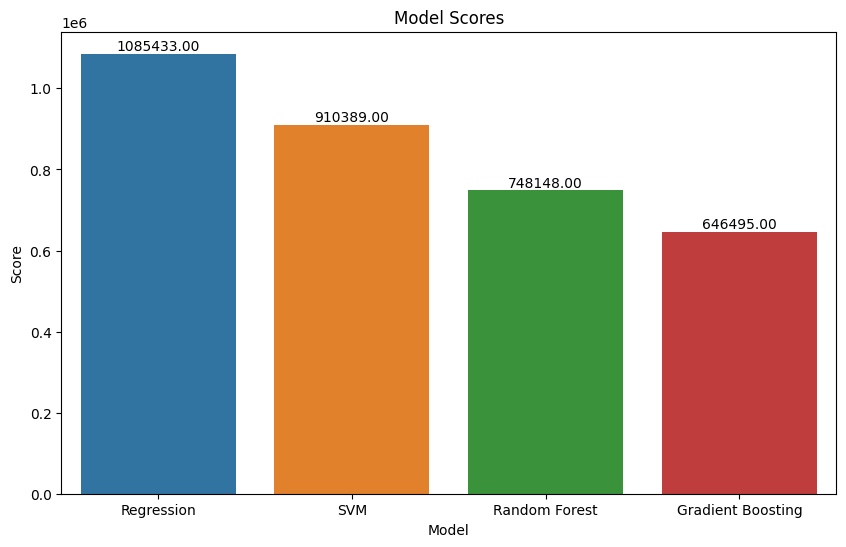

In [ ]:
# Creating the bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=decision, x='Model', y='Score')

# value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Set plot title and labels
plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Score')

# Display the plot
plt.show()

## Conclusion
Clearly, Gradient Boosting model is giving better accuracy as the root mean squared error is the least among all the other regressor models.

# Applying the Trained Model on the Housing Dataset_test File

In [ ]:

# importing the testing file to apply the model to
test_datas = pd.read_csv('/content/drive/MyDrive/DSN Housing Prediction in Nigeria/Housing_dataset_test.csv')


In [ ]:
test_data = test_datas
#test_data = test_data.drop(columns=['ID'])
test_data

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [ ]:
# Preprocess the text feature using label encoding
test_data['loc'] = le.fit_transform(test_data['loc'])
test_data['title'] = le.fit_transform(test_data['title'])

In [ ]:
pred = best_model.predict(test_data).astype('int')
pred

array([2184360, 1100946, 1422909, ..., 1985194, 1400207, 3238678])

In [ ]:
# importing the testing file to apply the model to
test_datas = pd.read_csv('/content/drive/MyDrive/DSN Housing Prediction in Nigeria/Housing_dataset_test.csv')


In [ ]:
test_datas['price'] = pred

In [ ]:
test_datas.sample(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
3206,1253,Nasarawa,Penthouse,4,3,2,2395849
1986,3016,Sokoto,Semi-detached duplex,5,2,1,1641708
1489,1183,Kano,Apartment,2,1,2,1041771
3385,8928,Katsina,Semi-detached duplex,7,6,4,2513436
948,1045,Adamawa,Terrace duplex,8,1,1,2357475
2043,12951,Kano,Townhouse,8,5,3,2759672
1208,7844,Edo,Terrace duplex,6,6,1,2484075
3674,2530,Anambra,Mansion,5,1,3,3153501
1317,1506,Bayelsa,Bungalow,3,1,4,1789706
1710,6555,Ekiti,Apartment,6,3,3,1910607


In [ ]:
# Creating and Exporting the Submission Files Data
submit_data = test_datas[['ID','price']]
submit_data.to_csv('/content/drive/MyDrive/DSN Housing Prediction in Nigeria/house_test_pred_grad.csv', index=False)

In [ ]:
submit_data.head()

,ID,price
0,845,2079074
1,1924,1111017
2,10718,1376539
3,12076,5746190
4,12254,2123225


In [ ]:
test_datas.to_csv('/content/drive/MyDrive/DSN Housing Prediction in Nigeria/house_test_pred.csv', index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a gradient boosting regressor
model_GBR = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create a grid search object
grid_search = GridSearchCV(model_GBR, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the root mean square error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Square Error: {rmse}")


Root Mean Square Error: 632227.9139571161
